In [1]:
from IPython.display import clear_output

In [2]:
%pip install gymnasium
%pip install flappy_bird_gymnasium

clear_output()

In [2]:
# %pip install torch matplotlib

clear_output()

# Content

In this notebook, you will build a PPO model implementation using pytorch and then train that implementation on flappy bird game.

- Write code to define and train the agent
- Also include a visualization of the agent's performance in the form of a video

for the environment, we will use flappy_bird_gymnasium environment. You can read more about this environment [here](https://github.com/markub3327/flappy-bird-gymnasium)

## PPO

PPO is motivated by the same question as TRPO: how can we take the biggest possible improvement step on a policy using the data we currently have, without stepping so far that we accidentally cause performance collapse? Where TRPO tries to solve this problem with a complex second-order method, PPO is a family of first-order methods that use a few other tricks to keep new policies close to old. PPO methods are significantly simpler to implement, and empirically seem to perform at least as well as TRPO.

There are two primary variants of PPO: PPO-Penalty and PPO-Clip.

**PPO-Penalty** approximately solves a KL-constrained update like TRPO, but penalizes the KL-divergence in the objective function instead of making it a hard constraint, and automatically adjusts the penalty coefficient over the course of training so that it's scaled appropriately.

**PPO-Clip** doesn't have a KL-divergence term in the objective and doesn’t have a constraint at all. Instead relies on specialized clipping in the objective function to remove incentives for the new policy to get far from the old policy.

Read more [here](https://spinningup.openai.com/en/latest/algorithms/ppo.html).

Here, we'll focus only on PPO-Clip.

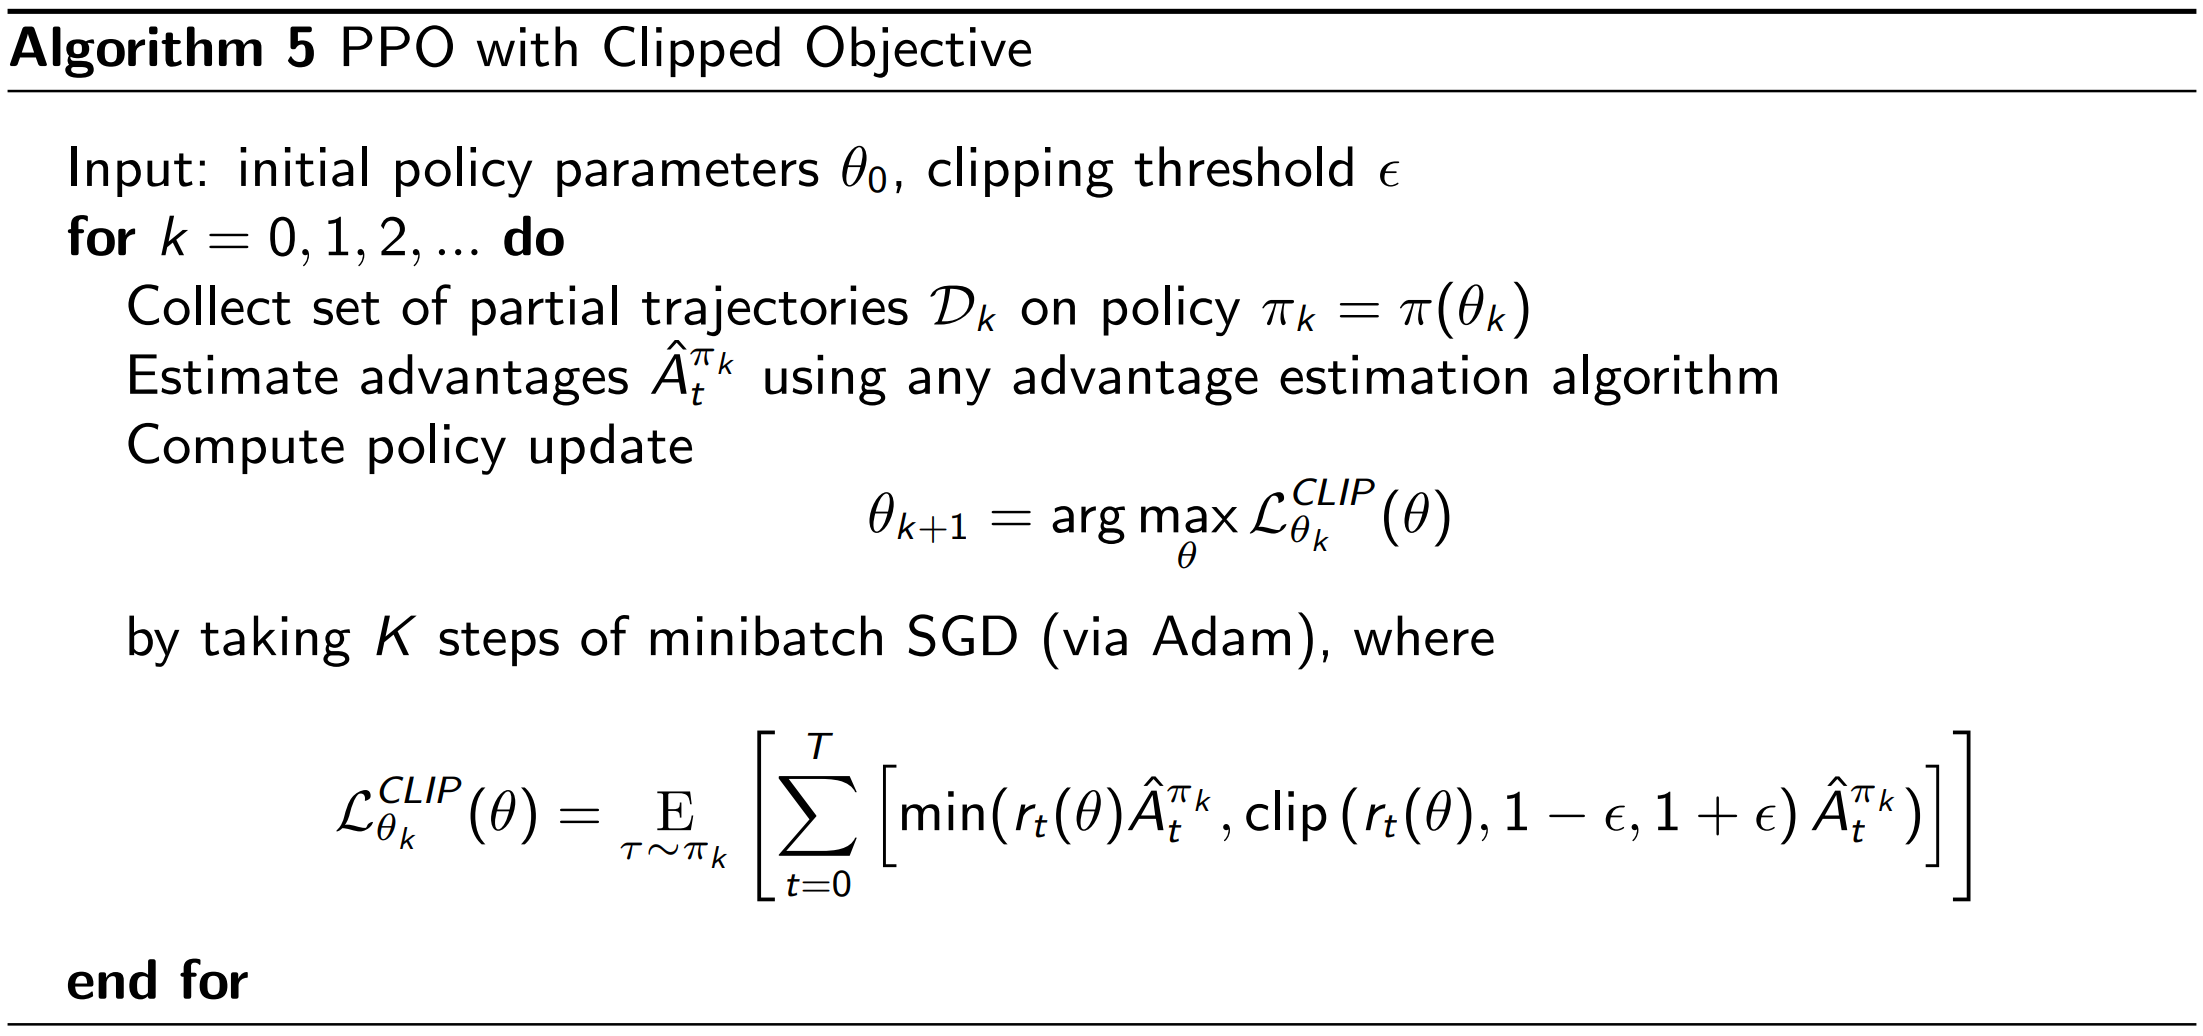

[Image Source](http://rail.eecs.berkeley.edu/deeprlcourse-fa17/)

In [3]:
import gymnasium as gym

import flappy_bird_gymnasium

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## Initialize the environment

In [7]:
env = gym.make("FlappyBird-v0", render_mode="rgb_array", use_lidar=False)  # Train on non-lidar observation space

### Solve here

write the code to define and train the agent:

### Visualization

You are provided with some functions which will help you visualize the results as a video.
Feel free to wrie your own code for visualization if you prefer

In [ ]:
def frames_to_video(frames, fps=24):
    # Do not modify

    fig = plt.figure(figsize=(frames[0].shape[1] / 100, frames[0].shape[0] / 100), dpi=100)
    ax = plt.axes()
    ax.set_axis_off()

    if len(frames[0].shape) == 2:  # Grayscale image
        im = ax.imshow(frames[0], cmap='gray')
    else:  # Color image
        im = ax.imshow(frames[0])

    def init():
        if len(frames[0].shape) == 2:
            im.set_data(frames[0], cmap='gray')
        else:
            im.set_data(frames[0])
        return im,

    def update(frame):
        if len(frames[frame].shape) == 2:
            im.set_data(frames[frame], cmap='gray')
        else:
            im.set_data(frames[frame])
        return im,

    interval = 1000 / fps
    anim = FuncAnimation(fig, update, frames=len(frames), init_func=init, blit=True, interval=interval)
    plt.close()
    return HTML(anim.to_html5_video())

In [15]:
state = env.reset()[0]
frames = []

while True:
    with torch.no_grad():
        
        # Write your code to choose an action here.
        action = 0


        
        state_next, r, done, truncated, info = env.step(action)
        frames.append(env.render())
        state = state_next
        if done or truncated:
            break

In [ ]:
frames_to_video(frames, fps=24)